In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_excel("/content/fitness_workout_recommendation_dataset.xlsx")

In [ ]:
df

,user_id,workout_plan_id,workout_plan_name,trainer_name,workout_duration_min,difficulty_level,workout_category,user_age,calories_burned,rating,subscription_type,workout_frequency_per_week,previous_workouts_completed,equipment_required
0,15796,9366,Full-Body Strength,Chris Anderson,57.6,Beginner,Balance & Stability,18.0,130.3,3.0,Premium,4,13,Yes
1,861,1928,Pilates Core Workout,Jessica Martinez,76.0,Beginner,Cardio,32.1,597.3,3.9,Premium,4,22,No
2,38159,9541,Boxing Conditioning,Robert Taylor,78.8,Intermediate,Endurance,23.0,374.8,4.2,Free,2,18,No
3,44733,3708,Calisthenics Mastery,Alex Johnson,50.1,Advanced,Flexibility,19.2,453.6,3.9,Free,1,24,No
4,11285,3361,Home Bodyweight Workout,Robert Taylor,17.1,Intermediate,Muscle Gain,18.0,238.9,3.4,Free,6,16,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10647,5466,Cycling Endurance,Sarah Miller,42.7,Intermediate,Muscle Gain,32.3,439.9,3.4,Free,3,12,Yes
99996,13800,2623,CrossFit Challenge,Michael Brown,19.2,Advanced,Endurance,43.7,397.7,2.7,Free,2,10,Yes
99997,47131,1556,Kettlebell Strength,Jessica Martinez,43.5,Beginner,Weight Loss,32.9,181.2,4.6,Free,2,20,No
99998,49654,6001,Cycling Endurance,Alex Johnson,41.6,Intermediate,Cardio,47.0,576.6,3.8,Free,3,11,No


In [ ]:
df.head()

,user_id,workout_plan_id,workout_plan_name,trainer_name,workout_duration_min,difficulty_level,workout_category,user_age,calories_burned,rating,subscription_type,workout_frequency_per_week,previous_workouts_completed,equipment_required
0,15796,9366,Full-Body Strength,Chris Anderson,57.6,Beginner,Balance & Stability,18.0,130.3,3.0,Premium,4,13,Yes
1,861,1928,Pilates Core Workout,Jessica Martinez,76.0,Beginner,Cardio,32.1,597.3,3.9,Premium,4,22,No
2,38159,9541,Boxing Conditioning,Robert Taylor,78.8,Intermediate,Endurance,23.0,374.8,4.2,Free,2,18,No
3,44733,3708,Calisthenics Mastery,Alex Johnson,50.1,Advanced,Flexibility,19.2,453.6,3.9,Free,1,24,No
4,11285,3361,Home Bodyweight Workout,Robert Taylor,17.1,Intermediate,Muscle Gain,18.0,238.9,3.4,Free,6,16,No


In [ ]:
df.tail()

,user_id,workout_plan_id,workout_plan_name,trainer_name,workout_duration_min,difficulty_level,workout_category,user_age,calories_burned,rating,subscription_type,workout_frequency_per_week,previous_workouts_completed,equipment_required
99995,10647,5466,Cycling Endurance,Sarah Miller,42.7,Intermediate,Muscle Gain,32.3,439.9,3.4,Free,3,12,Yes
99996,13800,2623,CrossFit Challenge,Michael Brown,19.2,Advanced,Endurance,43.7,397.7,2.7,Free,2,10,Yes
99997,47131,1556,Kettlebell Strength,Jessica Martinez,43.5,Beginner,Weight Loss,32.9,181.2,4.6,Free,2,20,No
99998,49654,6001,Cycling Endurance,Alex Johnson,41.6,Intermediate,Cardio,47.0,576.6,3.8,Free,3,11,No
99999,12929,5763,Cycling Endurance,Sarah Miller,55.0,Intermediate,Flexibility,30.2,164.9,4.2,Premium,2,21,No


In [ ]:
df.size

1400000

In [ ]:
df.shape

(100000, 14)

In [ ]:
df.isnull()

,user_id,workout_plan_id,workout_plan_name,trainer_name,workout_duration_min,difficulty_level,workout_category,user_age,calories_burned,rating,subscription_type,workout_frequency_per_week,previous_workouts_completed,equipment_required
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
user_id,0
workout_plan_id,0
workout_plan_name,0
trainer_name,0
workout_duration_min,0
difficulty_level,0
workout_category,0
user_age,0
calories_burned,0
rating,0


In [ ]:
df.info

<bound method DataFrame.info of        user_id  workout_plan_id        workout_plan_name      trainer_name  \
0        15796             9366       Full-Body Strength    Chris Anderson   
1          861             1928     Pilates Core Workout  Jessica Martinez   
2        38159             9541      Boxing Conditioning     Robert Taylor   
3        44733             3708     Calisthenics Mastery      Alex Johnson   
4        11285             3361  Home Bodyweight Workout     Robert Taylor   
...        ...              ...                      ...               ...   
99995    10647             5466        Cycling Endurance      Sarah Miller   
99996    13800             2623       CrossFit Challenge     Michael Brown   
99997    47131             1556      Kettlebell Strength  Jessica Martinez   
99998    49654             6001        Cycling Endurance      Alex Johnson   
99999    12929             5763        Cycling Endurance      Sarah Miller   

       workout_duration_min difficulty_level     workout_category  user_age  \
0                      57.6         Beginner  Balance & Stability      18.0   
1                      76.0         Beginner               Cardio      32.1   
2                      78.8     Intermediate            Endurance      23.0   
3                      50.1         Advanced          Flexibility      19.2   
4                      17.1     Intermediate          Muscle Gain      18.0   
...                     ...              ...                  ...       ...   
99995                  42.7     Intermediate          Muscle Gain      32.3   
99996                  19.2         Advanced            Endurance      43.7   
99997                  43.5         Beginner          Weight Loss      32.9   
99998                  41.6     Intermediate               Cardio      47.0   
99999                  55.0     Intermediate          Flexibility      30.2   

       calories_burned  rating subscription_type  workout_frequency_per_week  \
0                130.3     3.0           Premium                           4   
1                597.3     3.9           Premium                           4   
2                374.8     4.2              Free                           2   
3                453.6     3.9              Free                           1   
4                238.9     3.4              Free                           6   
...                ...     ...               ...                         ...   
99995            439.9     3.4              Free                           3   
99996            397.7     2.7              Free                           2   
99997            181.2     4.6              Free                           2   
99998            576.6     3.8              Free                           3   
99999            164.9     4.2           Premium                           2   

       previous_workouts_completed equipment_required  
0                               13                Yes  
1                               22                 No  
2                               18                 No  
3                               24                 No  
4                               16                 No  
...                            ...                ...  
99995                           12                Yes  
99996                           10                Yes  
99997                           20                 No  
99998                           11                 No  
99999                           21                 No  

[100000 rows x 14 columns]>

In [ ]:
df.describe

<bound method NDFrame.describe of        user_id  workout_plan_id        workout_plan_name      trainer_name  \
0        15796             9366       Full-Body Strength    Chris Anderson   
1          861             1928     Pilates Core Workout  Jessica Martinez   
2        38159             9541      Boxing Conditioning     Robert Taylor   
3        44733             3708     Calisthenics Mastery      Alex Johnson   
4        11285             3361  Home Bodyweight Workout     Robert Taylor   
...        ...              ...                      ...               ...   
99995    10647             5466        Cycling Endurance      Sarah Miller   
99996    13800             2623       CrossFit Challenge     Michael Brown   
99997    47131             1556      Kettlebell Strength  Jessica Martinez   
99998    49654             6001        Cycling Endurance      Alex Johnson   
99999    12929             5763        Cycling Endurance      Sarah Miller   

       workout_duration_min difficulty_level     workout_category  user_age  \
0                      57.6         Beginner  Balance & Stability      18.0   
1                      76.0         Beginner               Cardio      32.1   
2                      78.8     Intermediate            Endurance      23.0   
3                      50.1         Advanced          Flexibility      19.2   
4                      17.1     Intermediate          Muscle Gain      18.0   
...                     ...              ...                  ...       ...   
99995                  42.7     Intermediate          Muscle Gain      32.3   
99996                  19.2         Advanced            Endurance      43.7   
99997                  43.5         Beginner          Weight Loss      32.9   
99998                  41.6     Intermediate               Cardio      47.0   
99999                  55.0     Intermediate          Flexibility      30.2   

       calories_burned  rating subscription_type  workout_frequency_per_week  \
0                130.3     3.0           Premium                           4   
1                597.3     3.9           Premium                           4   
2                374.8     4.2              Free                           2   
3                453.6     3.9              Free                           1   
4                238.9     3.4              Free                           6   
...                ...     ...               ...                         ...   
99995            439.9     3.4              Free                           3   
99996            397.7     2.7              Free                           2   
99997            181.2     4.6              Free                           2   
99998            576.6     3.8              Free                           3   
99999            164.9     4.2           Premium                           2   

       previous_workouts_completed equipment_required  
0                               13                Yes  
1                               22                 No  
2                               18                 No  
3                               24                 No  
4                               16                 No  
...                            ...                ...  
99995                           12                Yes  
99996                           10                Yes  
99997                           20                 No  
99998                           11                 No  
99999                           21                 No  

[100000 rows x 14 columns]>

In [ ]:
list(df.columns)

['user_id',
 'workout_plan_id',
 'workout_plan_name',
 'trainer_name',
 'workout_duration_min',
 'difficulty_level',
 'workout_category',
 'user_age',
 'calories_burned',
 'rating',
 'subscription_type',
 'workout_frequency_per_week',
 'previous_workouts_completed',
 'equipment_required']

In [ ]:
df.dtypes

,0
user_id,int64
workout_plan_id,int64
workout_plan_name,object
trainer_name,object
workout_duration_min,float64
difficulty_level,object
workout_category,object
user_age,float64
calories_burned,float64
rating,float64


In [ ]:
df.dtypes.values

array([dtype('int64'), dtype('int64'), dtype('O'), dtype('O'),
       dtype('float64'), dtype('O'), dtype('O'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('O'), dtype('int64'),
       dtype('int64'), dtype('O')], dtype=object)

In [ ]:
df.dtypes.tolist()

[dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('O')]

In [ ]:
[dtype.name for dtype in df.dtypes]

['int64',
 'int64',
 'object',
 'object',
 'float64',
 'object',
 'object',
 'float64',
 'float64',
 'float64',
 'object',
 'int64',
 'int64',
 'object']

In [ ]:
df.ndim

2

In [ ]:
df.duplicated().sum()

0

In [ ]:
data_type_string ="\n".join([dtype.name for dtype in df.dtypes])
print(data_type_string)

int64
int64
object
object
float64
object
object
float64
float64
float64
object
int64
int64
object


In [ ]:
df.columns

Index(['user_id', 'workout_plan_id', 'workout_plan_name', 'trainer_name',
       'workout_duration_min', 'difficulty_level', 'workout_category',
       'user_age', 'calories_burned', 'rating', 'subscription_type',
       'workout_frequency_per_week', 'previous_workouts_completed',
       'equipment_required'],
      dtype='object')

In [ ]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
object_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} object features : {}'.format(len(object_features), object_features))

We have 8 numerical features : ['user_id', 'workout_plan_id', 'workout_duration_min', 'user_age', 'calories_burned', 'rating', 'workout_frequency_per_week', 'previous_workouts_completed']

We have 6 object features : ['workout_plan_name', 'trainer_name', 'difficulty_level', 'workout_category', 'subscription_type', 'equipment_required']


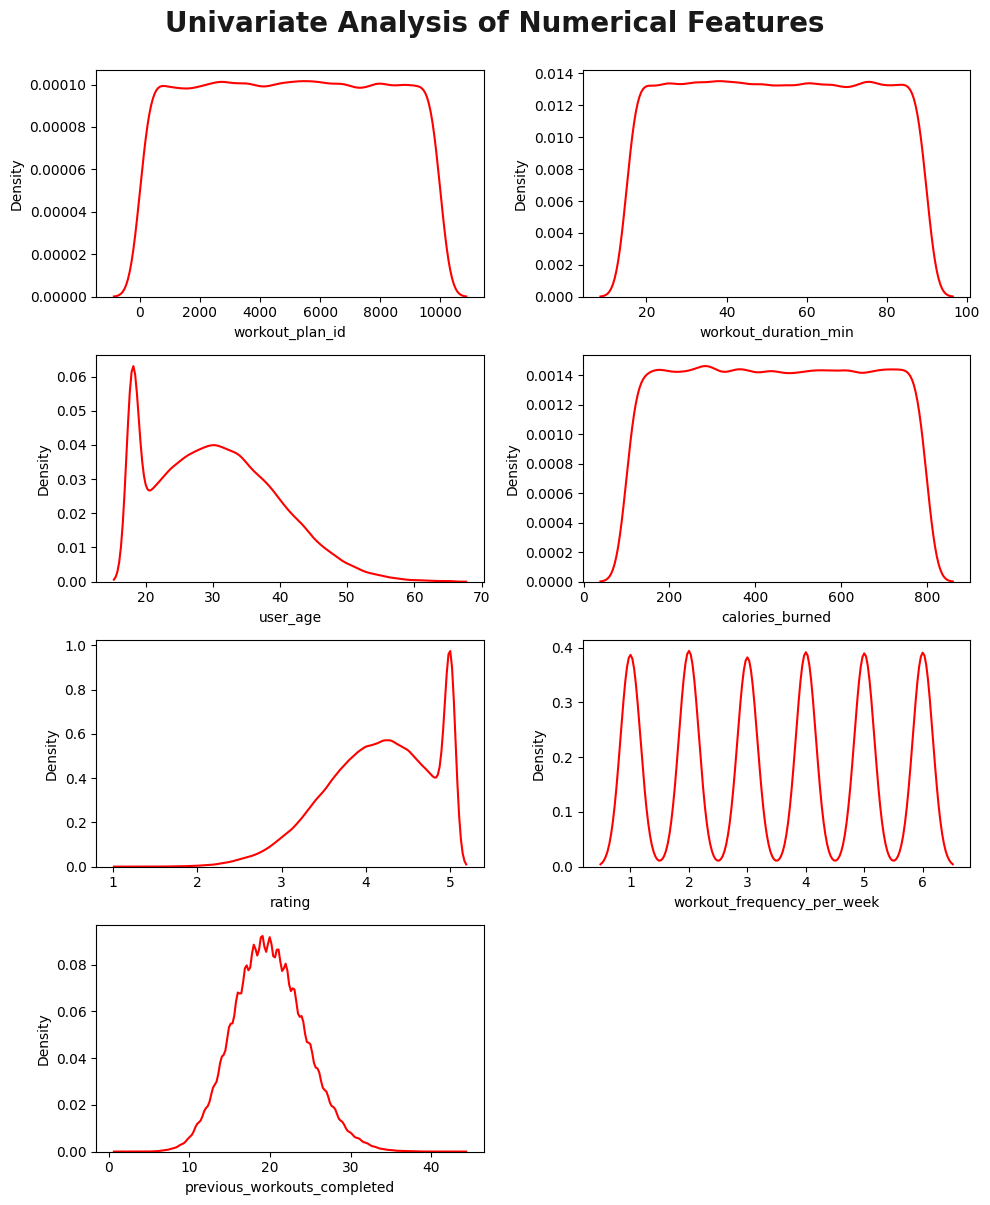

In [ ]:
import math
numeric_features.remove('user_id')
num_features = len(numeric_features)
rows = math.ceil(num_features / 2)  # Calculate number of rows

plt.figure(figsize=(10, 3 * rows))  # Adjust figure size based on the number of rows
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.9, y=1.)

for i in range(num_features):
    plt.subplot(rows, 2, i+1)  # 2 columns for each row
    sns.kdeplot(x=df[numeric_features[i]], color='red')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [ ]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 1 discrete features : ['workout_frequency_per_week']

We have 6 continuous_features : ['workout_plan_id', 'workout_duration_min', 'user_age', 'calories_burned', 'rating', 'previous_workouts_completed']


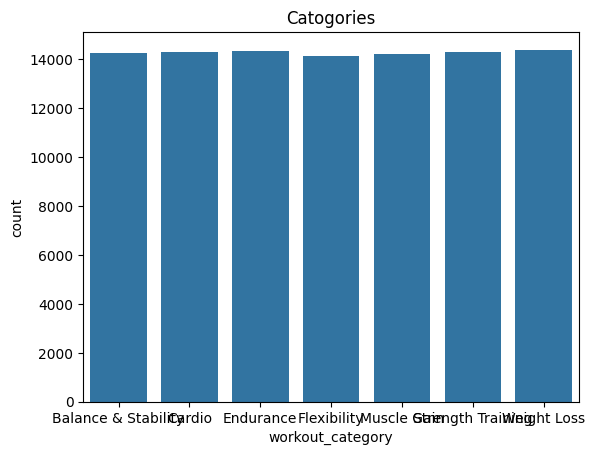

In [ ]:
sns.countplot(x='workout_category', data=df) # Removed the extra space at the end of 'workout_category'
plt.title("Catogories")
plt.show()

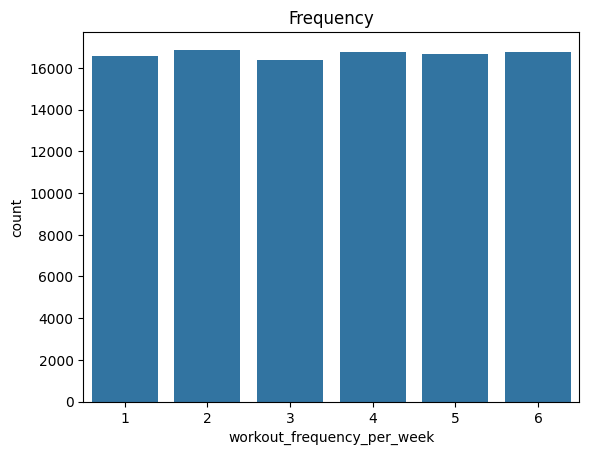

In [ ]:
sns.countplot(x='workout_frequency_per_week', data=df) # Removed the extra space at the end of 'workout_category'
plt.title("Frequency")
plt.show()

In [ ]:
df.drop(['user_id'], axis=1, inplace=True)

In [ ]:
df

,workout_plan_id,workout_plan_name,trainer_name,workout_duration_min,difficulty_level,workout_category,user_age,calories_burned,rating,subscription_type,workout_frequency_per_week,previous_workouts_completed,equipment_required
0,9366,Full-Body Strength,Chris Anderson,57.6,Beginner,Balance & Stability,18.0,130.3,3.0,Premium,4,13,Yes
1,1928,Pilates Core Workout,Jessica Martinez,76.0,Beginner,Cardio,32.1,597.3,3.9,Premium,4,22,No
2,9541,Boxing Conditioning,Robert Taylor,78.8,Intermediate,Endurance,23.0,374.8,4.2,Free,2,18,No
3,3708,Calisthenics Mastery,Alex Johnson,50.1,Advanced,Flexibility,19.2,453.6,3.9,Free,1,24,No
4,3361,Home Bodyweight Workout,Robert Taylor,17.1,Intermediate,Muscle Gain,18.0,238.9,3.4,Free,6,16,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5466,Cycling Endurance,Sarah Miller,42.7,Intermediate,Muscle Gain,32.3,439.9,3.4,Free,3,12,Yes
99996,2623,CrossFit Challenge,Michael Brown,19.2,Advanced,Endurance,43.7,397.7,2.7,Free,2,10,Yes
99997,1556,Kettlebell Strength,Jessica Martinez,43.5,Beginner,Weight Loss,32.9,181.2,4.6,Free,2,20,No
99998,6001,Cycling Endurance,Alex Johnson,41.6,Intermediate,Cardio,47.0,576.6,3.8,Free,3,11,No


# New section